<a href="https://colab.research.google.com/github/ashishpatel26/tcn-keras-Examples/blob/master/TCN_TimeSeries_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Library

In [25]:
!pip install wget
!pip install keras-tcn
import wget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense
from tqdm.notebook import tqdm

from tcn import TCN

In [26]:
wget.download("https://github.com/philipperemy/keras-tcn/raw/master/tasks/monthly-milk-production-pounds-p.csv")

'monthly-milk-production-pounds-p (1).csv'

### Read the dataset

In [27]:
milk = pd.read_csv('monthly-milk-production-pounds-p.csv', index_col=0, parse_dates=True)

### Display top5 Record

In [28]:
print(milk.shape)
milk.head()

(168, 1)


,milk_production_pounds
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


### Lookback 12 month windows

In [29]:
lookback_window = 12 

### Convert Milk Data into Numpy Array

In [30]:
milk = milk.values  

### Convert in to X, y format

In [31]:
x = []
y = []
for i in tqdm(range(lookback_window, len(milk))):
    x.append(milk[i - lookback_window:i])
    y.append(milk[i])

### Generate Array of list x and y

In [33]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(156, 12, 1)
(156, 1)


### Model Design

In [35]:
i = Input(shape=(lookback_window, 1))
m = TCN()(i)
m = Dense(1, activation='linear')(m)

model = Model(inputs=[i], outputs=[m])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12, 1)]           0         
_________________________________________________________________
tcn (TCN)                    (None, 64)                91136     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 91,201
Trainable params: 91,201
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile('adam','mae')

### Time for Model training...

In [50]:
print('Train...')
model.fit(x, y, epochs=100)

Train...
Epoch 1/100
5/5 [==============================] - 0s 25ms/step - loss: 271.5721
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: 202.3601
Epoch 3/100
5/5 [==============================] - 0s 23ms/step - loss: 129.1283
Epoch 4/100
5/5 [==============================] - 0s 25ms/step - loss: 119.5586
Epoch 5/100
5/5 [==============================] - 0s 25ms/step - loss: 82.7962
Epoch 6/100
5/5 [==============================] - 0s 23ms/step - loss: 29.5778
Epoch 7/100
5/5 [==============================] - 0s 23ms/step - loss: 26.9950
Epoch 8/100
5/5 [==============================] - 0s 25ms/step - loss: 23.8581
Epoch 9/100
5/5 [==============================] - 0s 23ms/step - loss: 27.1797
Epoch 10/100
5/5 [==============================] - 0s 24ms/step - loss: 37.1005
Epoch 11/100
5/5 [==============================] - 0s 27ms/step - loss: 38.2245
Epoch 12/100
5/5 [==============================] - 0s 23ms/step - loss: 27.9166
Epoch 13/100
5/5 [======

### Prediction with TCN Model

In [51]:
predict = model.predict(x)

### Plot the Result

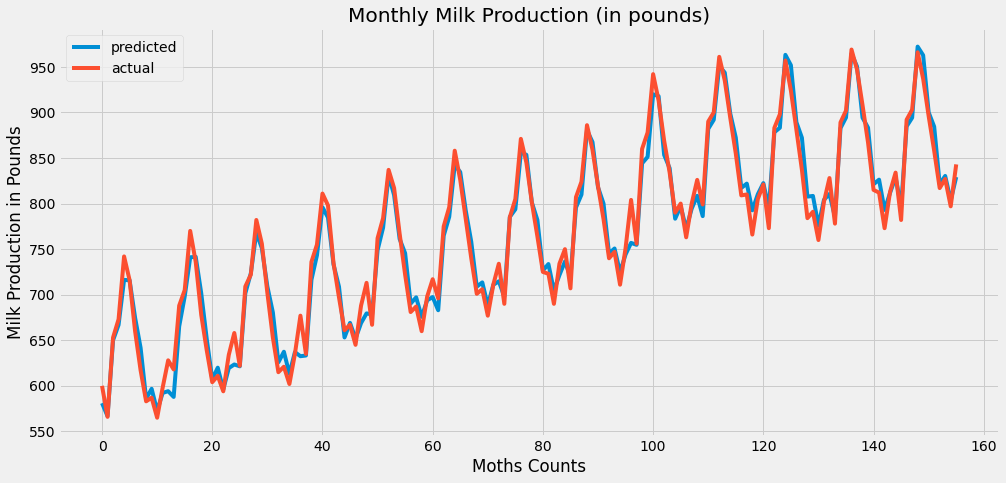

In [56]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (15,7))
plt.plot(predict)
plt.plot(y)
plt.title('Monthly Milk Production (in pounds)')
plt.legend(['predicted', 'actual'])
plt.xlabel("Moths Counts")
plt.ylabel("Milk Production in Pounds")
plt.show()